In [29]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter
from scipy.optimize import root

In [13]:
fontsize_legend = 20
fontsize_axes = 24
fontsize_ticks = 16
linewidth_all = 3
markersize_all = 8

(0.0, 0.35)

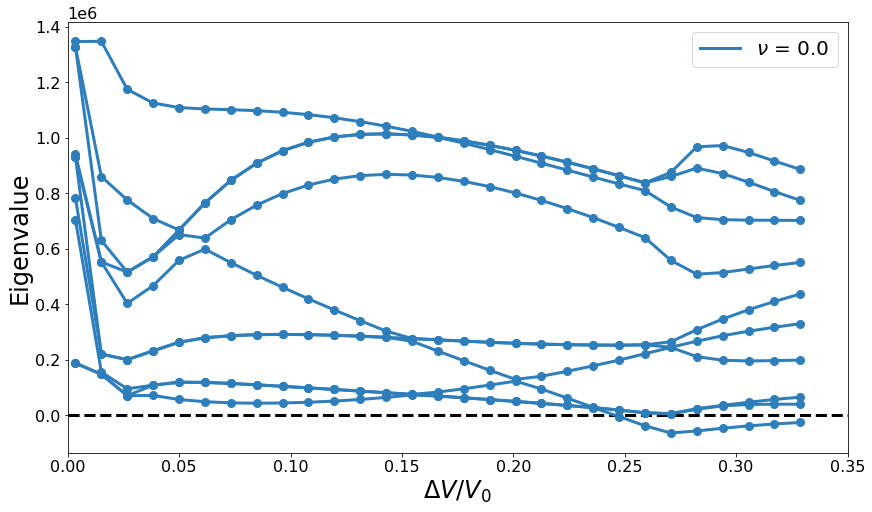

In [17]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i==0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)



ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)


# fig.savefig('data_processed/change_nu_4folds_val.jpg')


(-133798.0095703125, 1417157.0837890625)

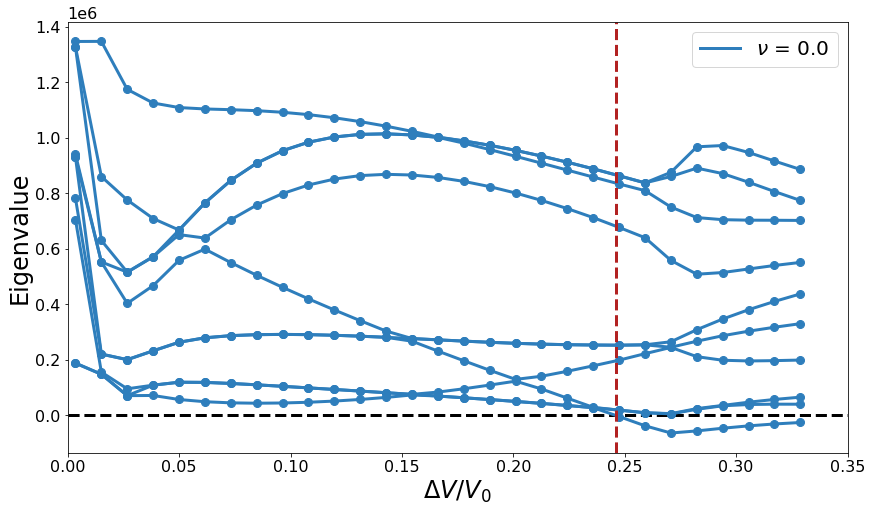

In [56]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 240

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i==0:
        idx_cur = initial_idx + i
        data_path = f'data_out/4fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)

ylim_cur = ax.get_ylim()
f = lambda x: np.interp(x,-3*temp_all,freq_all[:,0])
sol_root = root(f,0.25)
ax.vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'firebrick', '--', linewidth = linewidth_all)

ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)
ax.set_ylim(ylim_cur)


# fig.savefig('data_processed/change_nu_4folds_val.jpg')


(0.0, 0.35)

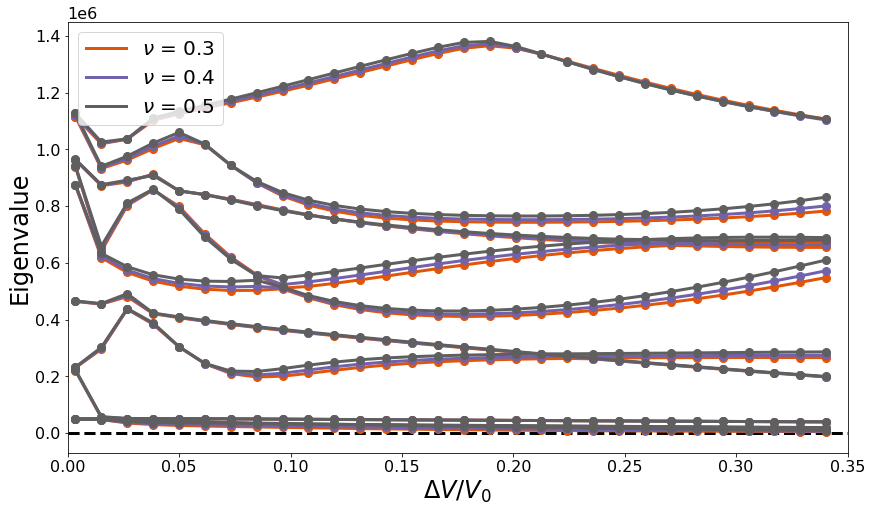

In [19]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,7), constrained_layout = True)

initial_idx = 300

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.35, 'k', '--', linewidth = linewidth_all)

for i,nu in enumerate(nu_try):
    if i > 2:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot, markersize = markersize_all)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, linewidth = linewidth_all)



ax.legend(loc = 'best', fontsize = fontsize_legend)
ax.set_xlabel('$\Delta V/V_0$', fontsize = fontsize_axes)
ax.set_ylabel('Eigenvalue', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.yaxis.offsetText.set_fontsize(fontsize_ticks)
ax.set_xlim(0,0.35)


# fig.savefig('data_processed/change_nu_2folds_val.jpg')


Text(0, 0.5, 'Eigenvalue')

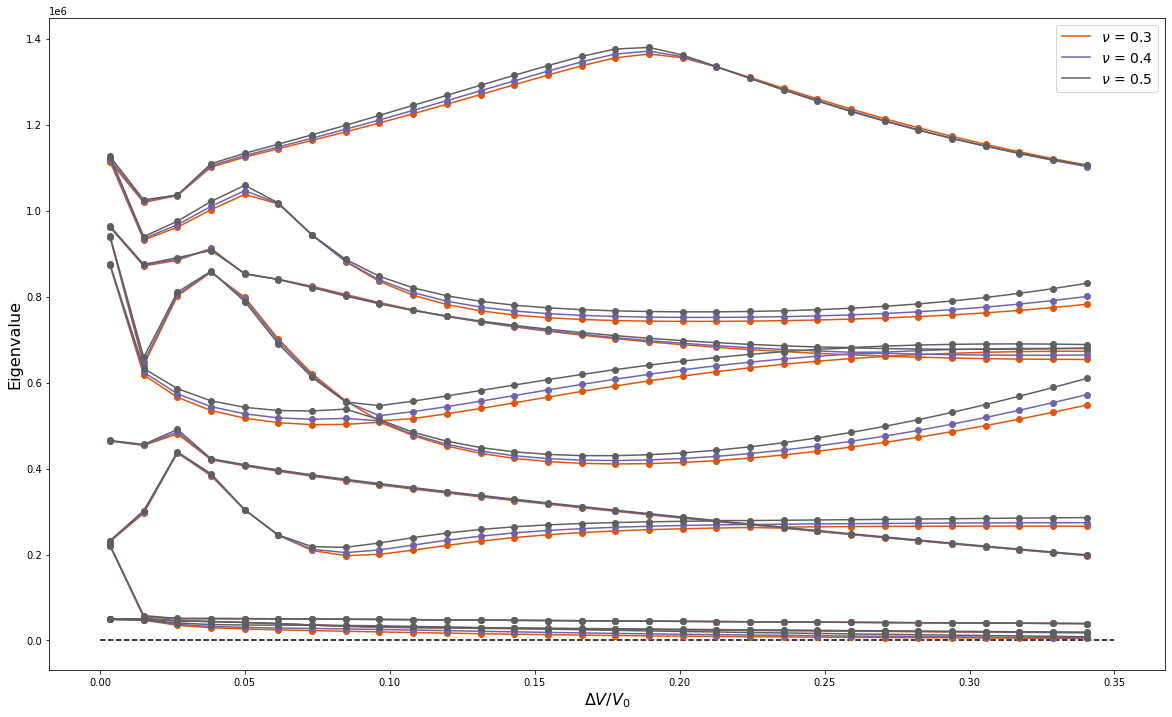

In [9]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 300
ax.hlines(0,0,0.35, 'k', '--')

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if i > 2:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Eigenvalue', fontsize = 16)


# fig.savefig('data_processed/change_nu_2folds_freq.jpg')
